Slicing plus other numpy array manipulations and visualisation with matplotlib.

For more information, see:
<br>
https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html

Date Created: 20 Sep 2018
<br>
Last Modified: 21 Sep 2018 
<br>
Humans Responsible: The Prickly Pythons

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 0.0 Motivation - Why numpy

In [2]:
x = [1,2,3,4]

In [3]:
x

[1, 2, 3, 4]

In [4]:
type(x)

list

In [5]:
y = [1,2,3,4]

In [6]:
y

[1, 2, 3, 4]

In [7]:
x + y

[1, 2, 3, 4, 1, 2, 3, 4]

In [8]:
x = np.array([1,2,3,4])

In [9]:
x

array([1, 2, 3, 4])

In [10]:
type(x)

numpy.ndarray

In [11]:
y = np.array([1,2,3,4])

In [12]:
y

array([1, 2, 3, 4])

In [13]:
x + y

array([2, 4, 6, 8])

# 1.0 Arrays in 1D

In [14]:
x = np.array([1,2,3,4,5,6,7,8,9])
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
x[0]

1

In [16]:
x[0:5]

array([1, 2, 3, 4, 5])

In [17]:
x[0:5:1]

array([1, 2, 3, 4, 5])

In [18]:
x[0:5:2]

array([1, 3, 5])

In [19]:
x[5::-1]

array([6, 5, 4, 3, 2, 1])

In [20]:
x[0:-3] # French analogy

array([1, 2, 3, 4, 5, 6])

In [21]:
x[0:len(x)-3]

array([1, 2, 3, 4, 5, 6])

In [22]:
x[4::-1]

array([5, 4, 3, 2, 1])

In [23]:
x[:]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# 2.0 Arrays in 2D

In [24]:
y = np.array([[1,2,3], [4,5,6], [7,8,9]])
y

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [25]:
y[0:2, 0:-1]

array([[1, 2],
       [4, 5]])

In [26]:
y.reshape([1,9])

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [27]:
x.reshape([3,3])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## 2.1 Arrays as images

In [28]:
%matplotlib inline

In [29]:
from skimage import data

In [30]:
img = data.camera()

In [31]:
img.shape

(512, 512)

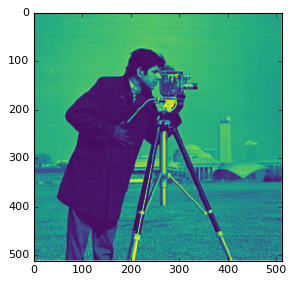

In [32]:
plt.imshow(img, cmap='viridis', interpolation='none')
plt.show()

In [ ]:
plt.imshow?

## 2.2 Slicing

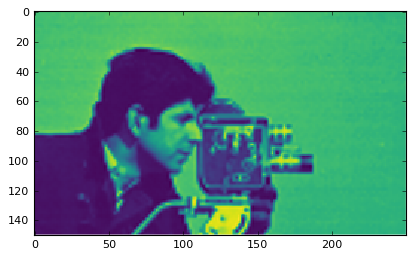

In [34]:
plt.imshow(img[50:200, 150:400], cmap='viridis', interpolation='none')
plt.show()

# 3.0 Arrays in 3D

Adapted from this good tutorial:
<br>
https://www.datacamp.com/community/tutorials/matplotlib-3d-volumetric-data

Getting the data:
```
if (running for first time):
    from skimage import io
    img = io.imread("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/attention-mri.tif")
    np.save("MRI_test_data.npy", img)
else:
    img = np.load("MRI_test_data.npy")
```


In [94]:
img.shape

(157, 189, 68)

<IPython.core.display.Javascript object>


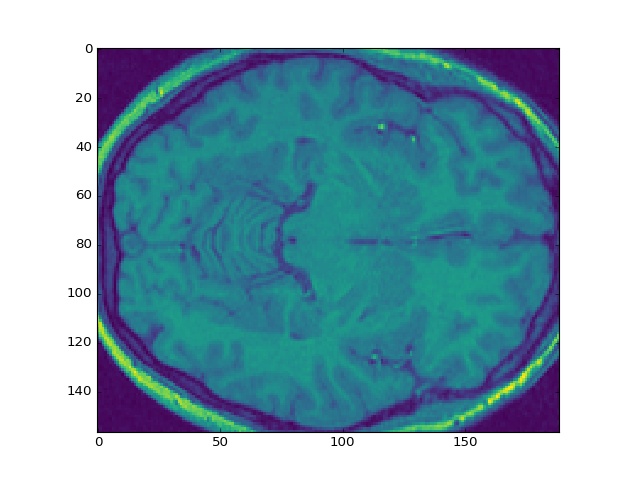

In [95]:
plt.imshow(img[:,:,20], cmap='viridis', interpolation='none')
plt.show()

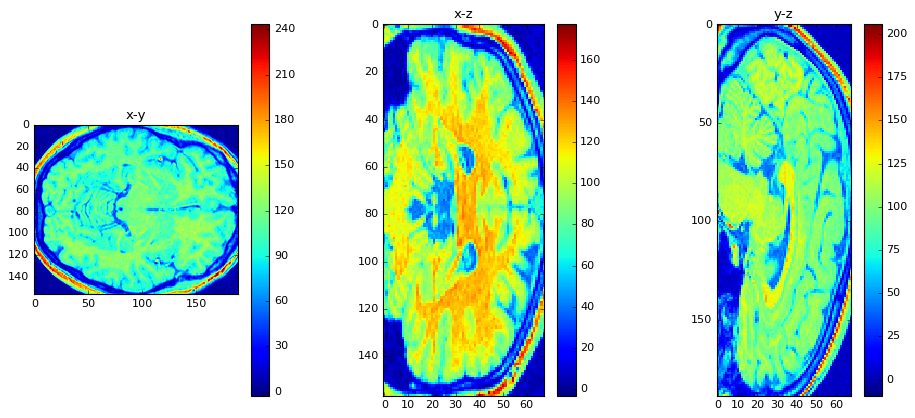

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,6))

im = ax[0].imshow(img[:,:,20], interpolation='nearest')
fig.colorbar(im, ax=ax[0])
ax[0].set_title("x-y")

im = ax[1].imshow(img[:,75,:], interpolation='nearest')
fig.colorbar(im, ax=ax[1])
ax[1].set_title("x-z")

im = ax[2].imshow(img[75,:,:], interpolation='nearest')
fig.colorbar(im, ax=ax[2])
ax[2].set_title("y-z")

plt.show()

## 3.1 A bit of interaction

In [99]:
%matplotlib notebook

### Prototype - testing

In [100]:
def process_key(event):
    if event.key == 'o':
        prev_slice()
    elif event.key == 'p':
        next_slice()

def prev_slice():
    ax.imshow(img[:,:,42])

def next_slice():
    ax.imshow(img[:,:,44])

<IPython.core.display.Javascript object>


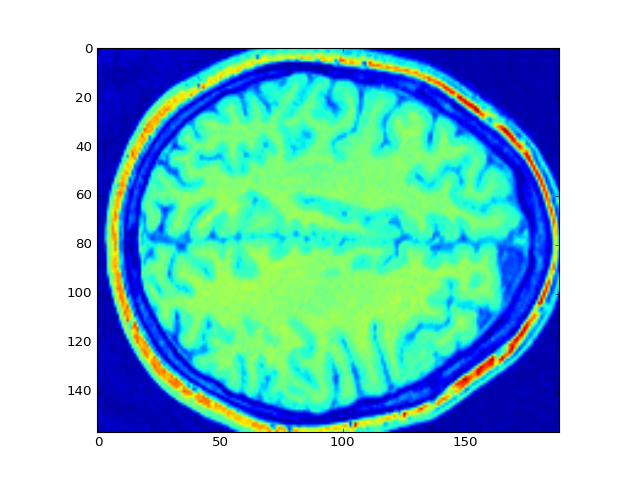

7

In [101]:
fig, ax = plt.subplots()
ax.imshow(img[:,:,43])

fig.canvas.mpl_connect('key_press_event', process_key)

### Workable version

In [102]:
def multi_slice_viewer(img):
    fig, ax = plt.subplots()
    ax.volume = img
    ax.index = int(img.shape[2] / 2)
    ax.imshow(img[:,:,ax.index]) # Display initial image
    fig.canvas.mpl_connect('key_press_event', process_key) # Black box for capturing keystroke events

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    
    if event.key == 'o':
        prev_slice(ax)
    elif event.key == 'p':
        next_slice(ax)

    fig.canvas.draw()

def prev_slice(ax):
    """Go to the previous slice."""
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[2]  # wrap around using the modulo operator %
    ax.images[0].set_array(volume[:,:,ax.index])

def next_slice(ax):
    """Go to the next slice."""
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[2] # wrap around using the modulo operator %
    ax.images[0].set_array(volume[:,:,ax.index])

<IPython.core.display.Javascript object>


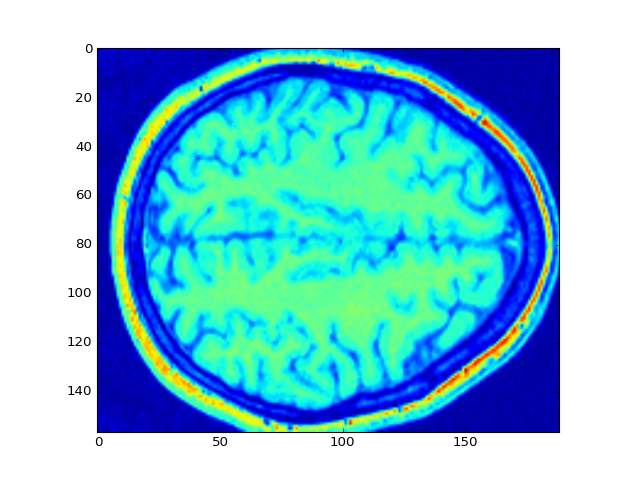

In [103]:
multi_slice_viewer(img)